In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#EDA (Exploratory Data Analysis)

1. Data Cleaning and Preprocessing

In [73]:
# from google.colab import files
# uploaded= files.upload()

In [74]:
# importing the dataset
df = pd.read_csv("solarpowergeneration.csv")

To figure out how many rows and columns are there in our dataset

In [75]:
df.shape

(2920, 10)

for checking of header column in the dataset

In [76]:
df.head()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069


As a part of Data Cleaning and Preparation we have to check for Load the dataset into a DataFrame or equivalent data structure.
Handle missing values appropriately (e.g., imputation, deletion).
Identify and correct any inconsistencies in data types (e.g., numerical values stored as strings).
Detect and treat outliers if necessary.


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2920 entries, 0 to 2919
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   distance-to-solar-noon       2920 non-null   float64
 1   temperature                  2920 non-null   int64  
 2   wind-direction               2920 non-null   int64  
 3   wind-speed                   2920 non-null   float64
 4   sky-cover                    2920 non-null   int64  
 5   visibility                   2920 non-null   float64
 6   humidity                     2920 non-null   int64  
 7   average-wind-speed-(period)  2919 non-null   float64
 8   average-pressure-(period)    2920 non-null   float64
 9   power-generated              2920 non-null   int64  
dtypes: float64(5), int64(5)
memory usage: 228.3 KB


In [78]:
# As a part of Data cleansing we check the data for missing values/ null values
# null counts for columns
null_count_col = df.isnull().sum().value_counts(ascending=False)
null_count_col

# null percentage for columns
null_per_col =(df.isnull().sum() * 100 / len(df)).value_counts(ascending=False)
null_per_col

print("Null counts for columns:\n\n", null_count_col, "/n")
print("Null percentage for columns:\n\n", null_per_col)

Null counts for columns:

 0    9
1    1
Name: count, dtype: int64 /n
Null percentage for columns:

 0.000000    9
0.034247    1
Name: count, dtype: int64


In [79]:
df.describe()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
count,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2920.000000,2919.000000,2920.000000,2920.000000
mean,0.503294,58.468493,24.953425,10.096986,1.987671,9.557705,73.513699,10.129154,30.017760,6979.846233
std,0.298024,6.841200,6.915178,4.838185,1.411978,1.383884,15.077139,7.261547,0.142006,10312.336413
min,0.050401,42.000000,1.000000,1.100000,0.000000,0.000000,14.000000,0.000000,29.480000,0.000000
25%,0.243714,53.000000,25.000000,6.600000,1.000000,10.000000,65.000000,5.000000,29.920000,0.000000
50%,0.478957,59.000000,27.000000,10.000000,2.000000,10.000000,77.000000,9.000000,30.000000,404.000000
75%,0.739528,63.000000,29.000000,13.100000,3.000000,10.000000,84.000000,15.000000,30.110000,12723.500000
max,1.141361,78.000000,36.000000,26.600000,4.000000,10.000000,100.000000,40.000000,30.530000,36580.000000


In [80]:
df.columns

Index(['distance-to-solar-noon', 'temperature', 'wind-direction', 'wind-speed',
       'sky-cover', 'visibility', 'humidity', 'average-wind-speed-(period)',
       'average-pressure-(period)', 'power-generated'],
      dtype='object')

In [81]:
#Check for missing value
df.isnull()

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
2915,False,False,False,False,False,False,False,False,False,False
2916,False,False,False,False,False,False,False,False,False,False
2917,False,False,False,False,False,False,False,False,False,False
2918,False,False,False,False,False,False,False,False,False,False


In [82]:
df.isnull().sum()

distance-to-solar-noon         0
temperature                    0
wind-direction                 0
wind-speed                     0
sky-cover                      0
visibility                     0
humidity                       0
average-wind-speed-(period)    1
average-pressure-(period)      0
power-generated                0
dtype: int64

In [83]:
df = df.fillna(value=df['average-wind-speed-(period)'].mean())
df['average-wind-speed-(period)'].isnull().sum()

np.int64(0)

In [84]:
df.isnull().sum().sum()

np.int64(0)

###### To clean the data we can remove the outliers for better performance

In [85]:
#  Warnings removal
import warnings
warnings.filterwarnings('ignore')

###Identify Numerical Columns:

In [86]:
numerical_cols = df.select_dtypes(include=np.number).columns

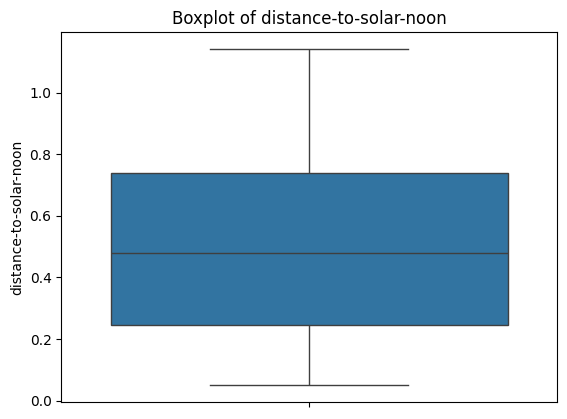

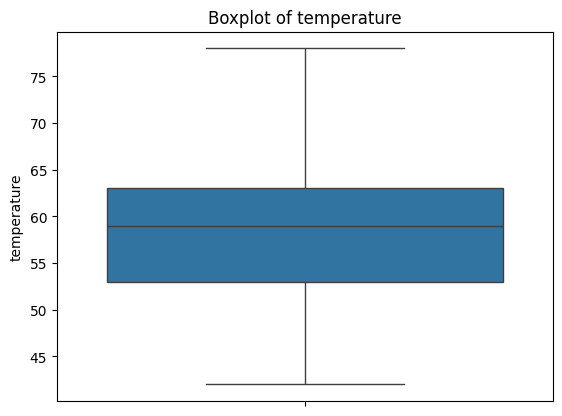

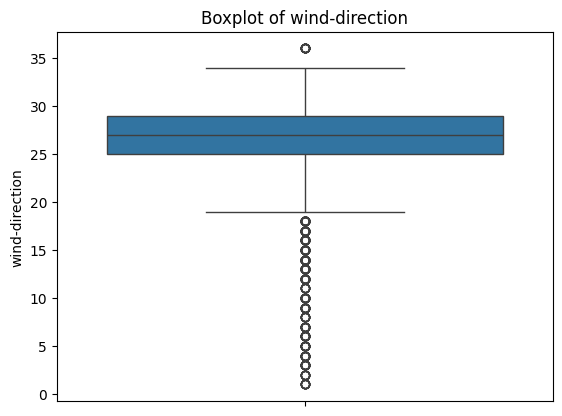

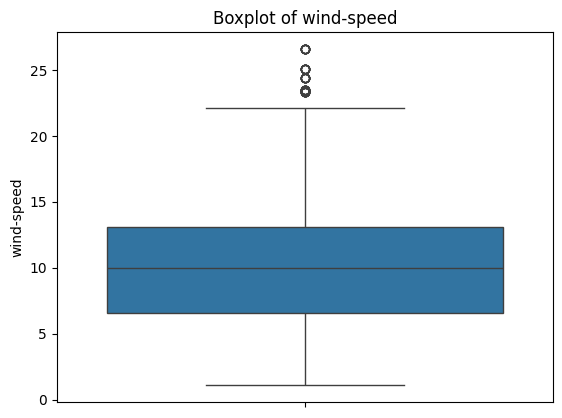

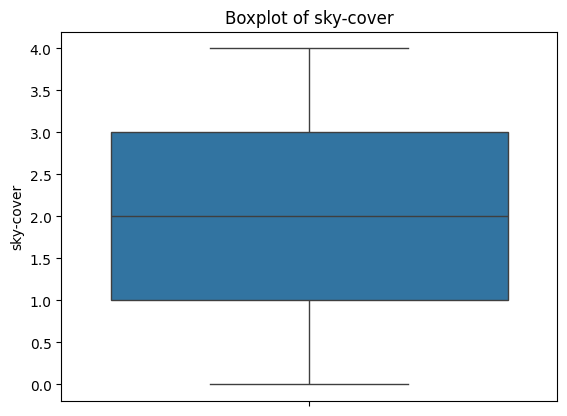

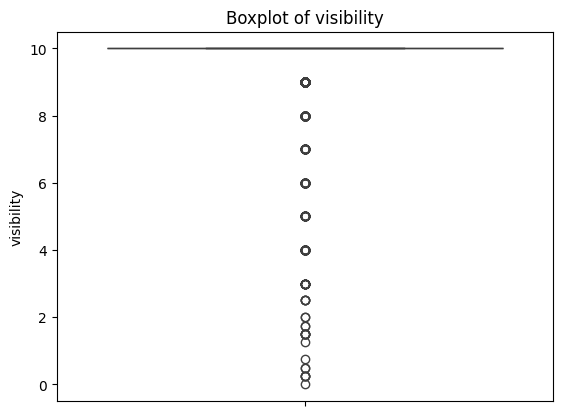

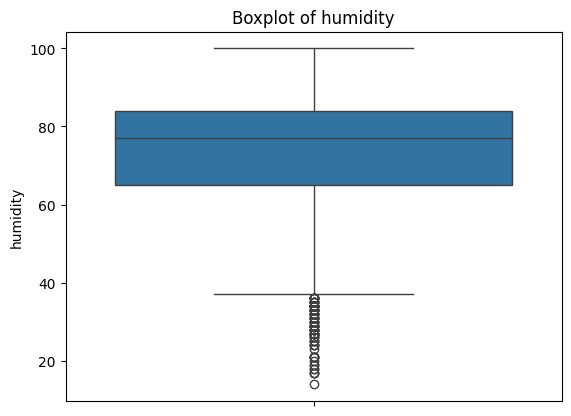

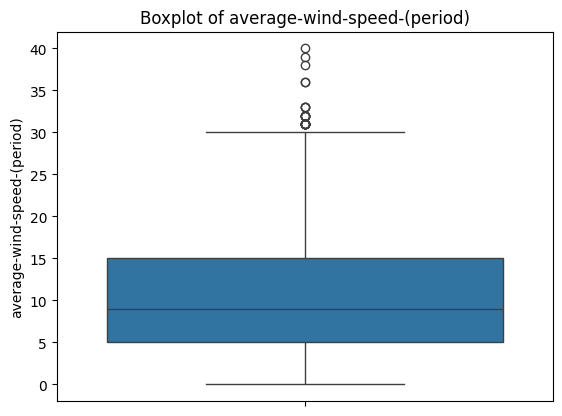

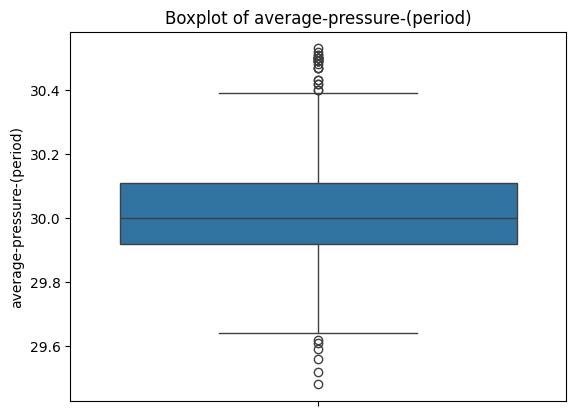

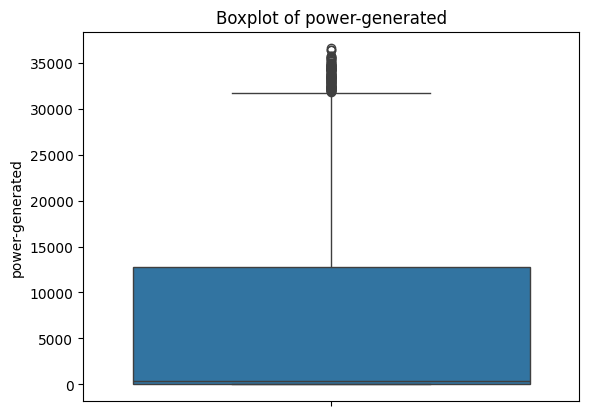

In [87]:
for col in numerical_cols:
  plt.figure()
  sns.boxplot(df[col])
  plt.title(f"Boxplot of {col}")
  plt.show()

In [88]:
# using 'Z'scores to remove outliers
upper_limit = df['wind-direction'].mean()+3*df['wind-direction'].std()
lower_limit = df['wind-direction'].mean()-3*df['wind-direction'].std()
print('upper limit:',upper_limit)
print('lower limit:',lower_limit)
print('outliers:', upper_limit-lower_limit)

upper limit: 45.6989586625041
lower limit: 4.207890652564391
outliers: 41.49106800993971


In [89]:
#finding the outliers
df.loc[(df['wind-direction']>upper_limit) | (df['wind-direction']<lower_limit)]

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
768,1.036207,51,3,3.6,1,10.0,68,0.0,30.22,0
769,0.725862,51,3,3.6,0,10.0,74,0.0,30.21,0
770,0.415517,51,3,3.6,1,10.0,86,0.0,30.24,110
771,0.105172,51,3,3.6,1,8.0,77,7.0,30.26,13734
772,0.205172,51,3,3.6,1,7.0,62,0.0,30.21,20887
...,...,...,...,...,...,...,...,...,...,...
1147,0.134551,53,2,2.6,4,4.0,96,0.0,30.02,120
1148,0.164452,53,2,2.6,4,4.0,93,7.0,30.00,4956
1149,0.463455,53,2,2.6,4,8.0,93,0.0,30.00,2298
1150,0.762458,53,2,2.6,4,9.0,93,0.0,30.00,0


In [90]:
# Trimming - delete the outliered data
df1= df.loc[(df['wind-direction']<upper_limit)&(df['wind-direction']>lower_limit)]
print(df1)

      distance-to-solar-noon  temperature  wind-direction  wind-speed  \
0                   0.859897           69              28         7.5   
1                   0.628535           69              28         7.5   
2                   0.397172           69              28         7.5   
3                   0.165810           69              28         7.5   
4                   0.065553           69              28         7.5   
...                      ...          ...             ...         ...   
2915                0.166453           63              27        13.9   
2916                0.064020           63              27        13.9   
2917                0.294494           63              27        13.9   
2918                0.524968           63              27        13.9   
2919                0.755442           63              27        13.9   

      sky-cover  visibility  humidity  average-wind-speed-(period)  \
0             0        10.0        75                

<Axes: ylabel='wind-direction'>

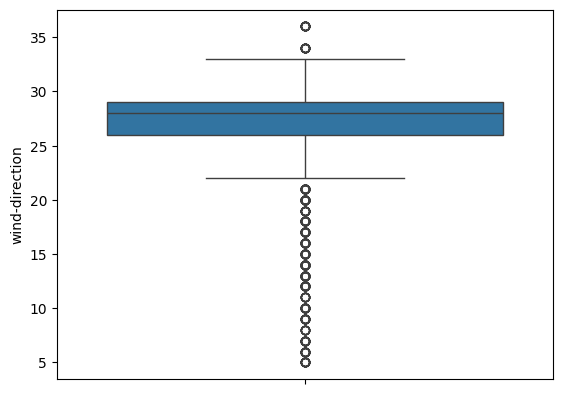

In [91]:
sns.boxplot(df1['wind-direction'])

In [92]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75,8.0,29.82,0
1,0.628535,69,28,7.5,0,10.0,77,5.0,29.85,0
2,0.397172,69,28,7.5,0,10.0,70,0.0,29.89,5418
3,0.165810,69,28,7.5,0,10.0,33,0.0,29.91,25477
4,0.065553,69,28,7.5,0,10.0,21,3.0,29.89,30069
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75,10.0,29.93,6995
2916,0.064020,63,27,13.9,1,10.0,66,15.0,29.91,29490
2917,0.294494,63,27,13.9,2,10.0,68,21.0,29.88,17257
2918,0.524968,63,27,13.9,2,10.0,81,17.0,29.87,677


In [93]:
df['distance-to-solar-noon'].std()
print('standard deviation of distance-to-solar-noon:',df['distance-to-solar-noon'].std())
df['temperature'].std()
print('standard deviation of temperature:',df['temperature'].std())
df['wind-direction'].std()
print('standard deviation of wind-direction:',df['wind-direction'].std())
df['wind-speed'].std()
print('standard deviation of wind-speed:',df['wind-speed'].std())
df['sky-cover'].std()
print('standard deviation of sky-cover:',df['sky-cover'].std())
df['visibility'].std()
print('standard deviation of visibility:',df['visibility'].std())
df['humidity'].std()
print('standard deviation of humidity:',df['humidity'].std())
df['average-wind-speed-(period)'].std()
print('standard deviation of average-wind-speed-(period):',df['average-wind-speed-(period)'].std())
df['average-pressure-(period)'].std()
print('standard deviation of average-pressure-(period):',df['average-pressure-(period)'].std())
df['power-generated'].std()
print('standard deviation of power-generated:',df['power-generated'].std())

standard deviation of distance-to-solar-noon: 0.29802354400173364
standard deviation of temperature: 6.841200312039008
standard deviation of wind-direction: 6.915178001656619
standard deviation of wind-speed: 4.838185069335698
standard deviation of sky-cover: 1.4119778518284123
standard deviation of visibility: 1.3838837251315257
standard deviation of humidity: 15.07713923327884
standard deviation of average-wind-speed-(period): 7.260302575948544
standard deviation of average-pressure-(period): 0.14200583367403716
standard deviation of power-generated: 10312.336413252266


In [94]:
(df['wind-direction']).describe()

count    2920.000000
mean       24.953425
std         6.915178
min         1.000000
25%        25.000000
50%        27.000000
75%        29.000000
max        36.000000
Name: wind-direction, dtype: float64

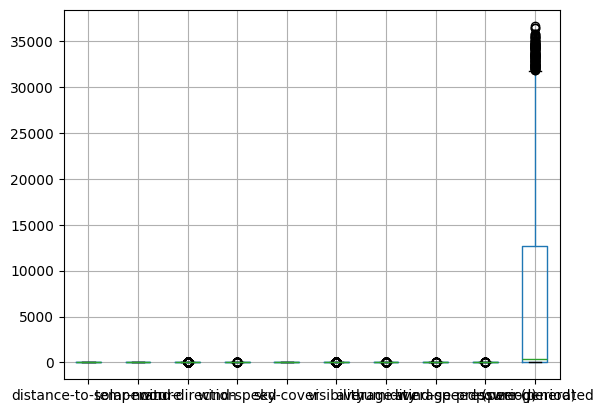

In [95]:
# Data visualization is main part to compare a data with more information
df.boxplot();

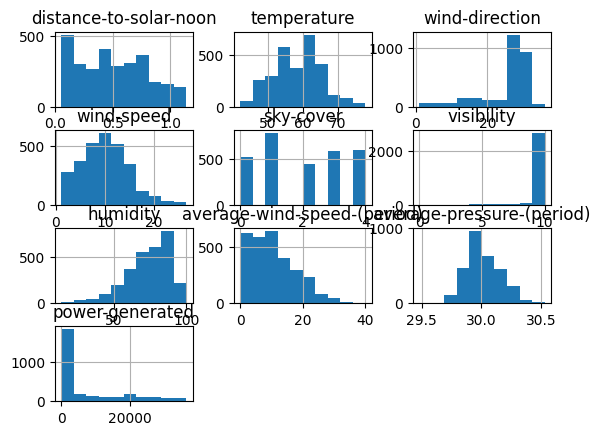

In [96]:
df.hist();

there was no categorical column to display with the help of pie chart

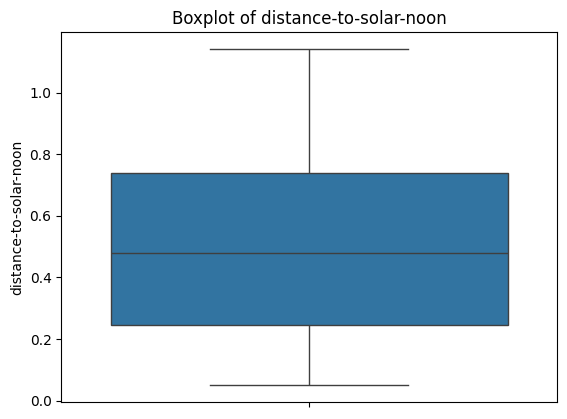

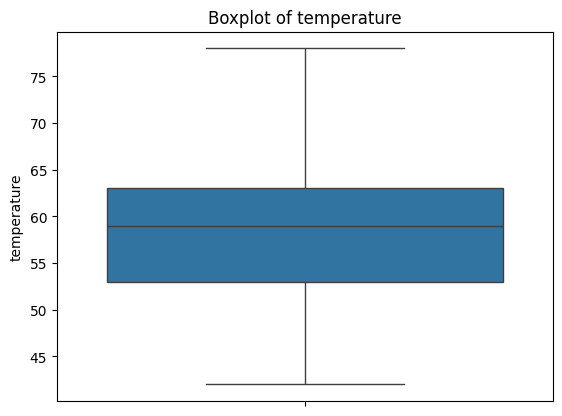

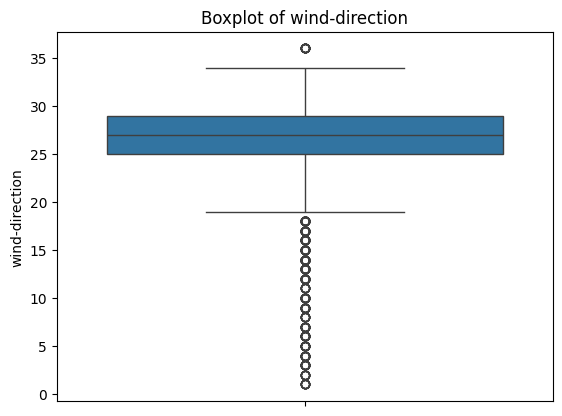

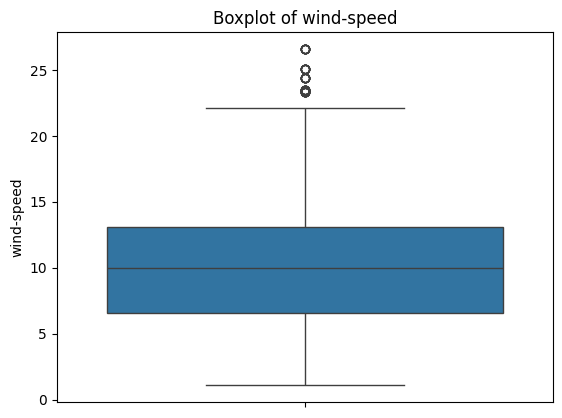

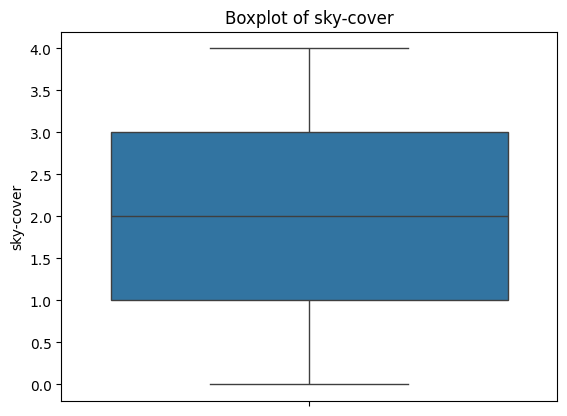

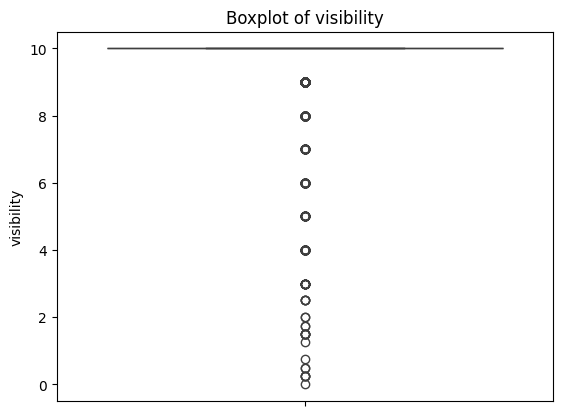

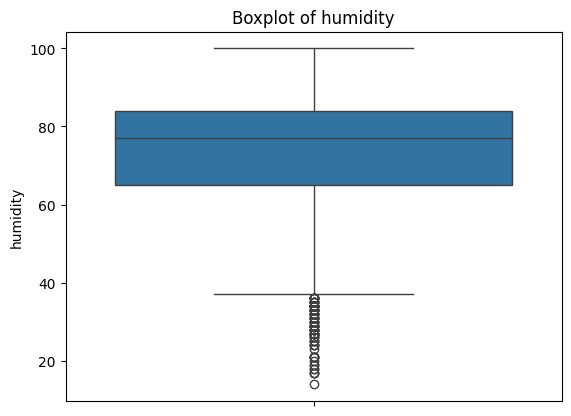

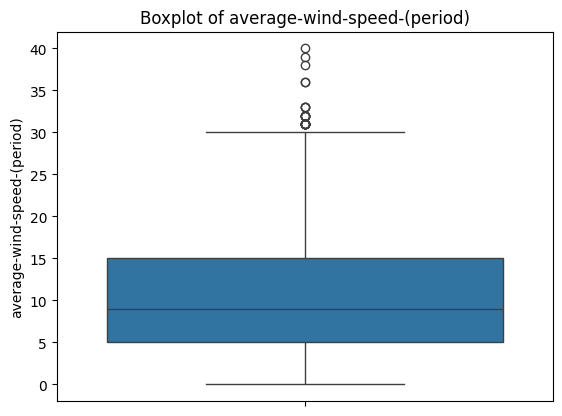

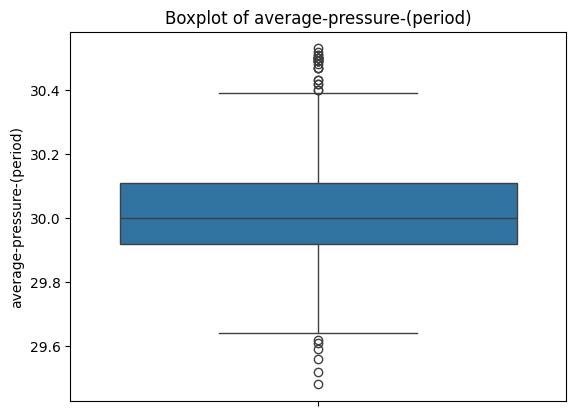

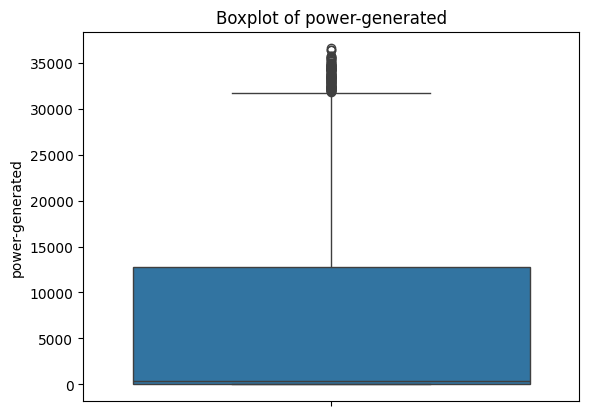

In [97]:
#Detect and treat outliers
# Visualize outliers using boxplots
for col in numerical_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

In [98]:
# Treat outliers using the 5th and 95th percentile capping
for col in numerical_cols:
    lower_bound = df[col].quantile(0.05)
    upper_bound = df[col].quantile(0.95)
    df[col] = np.clip(df[col], lower_bound, upper_bound)

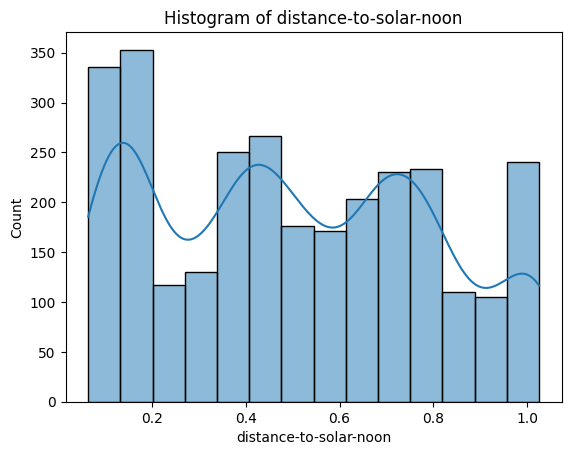

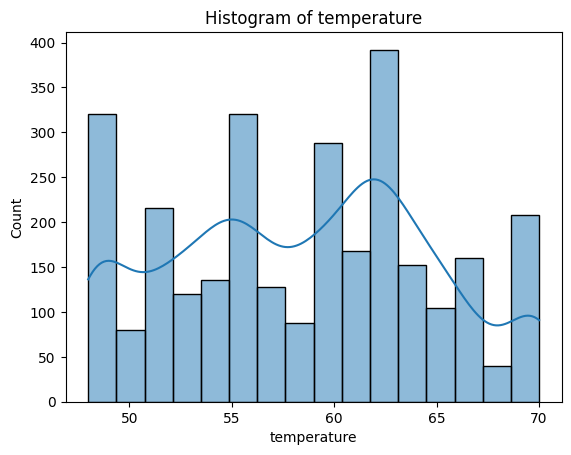

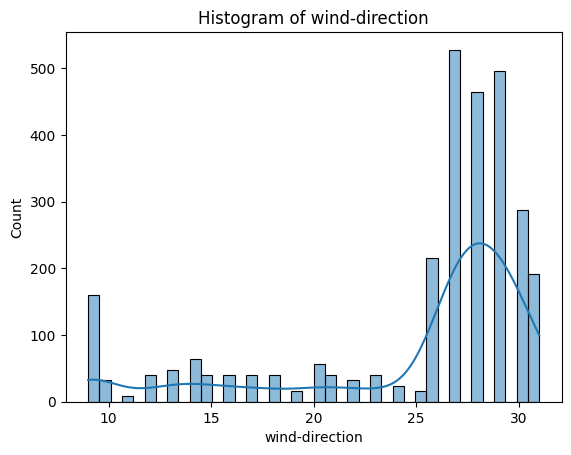

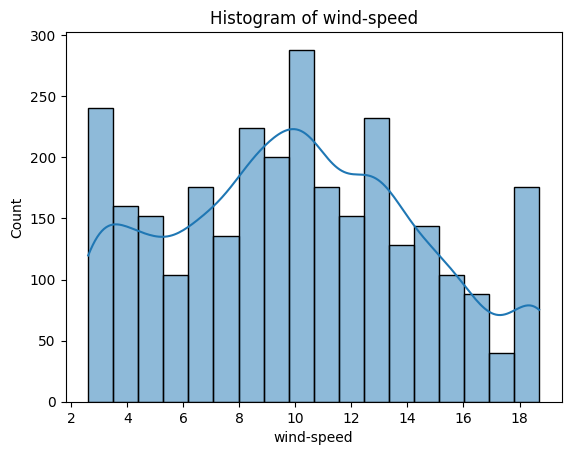

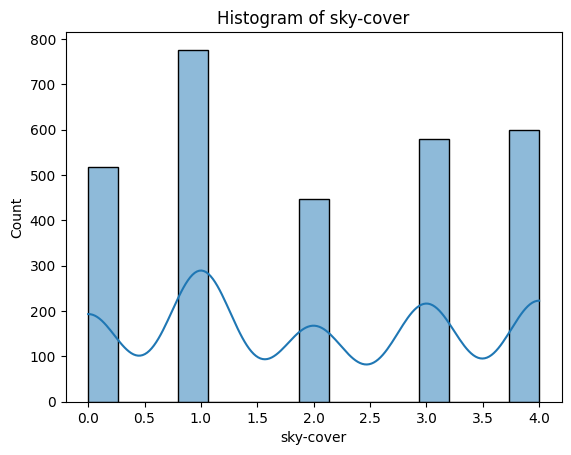

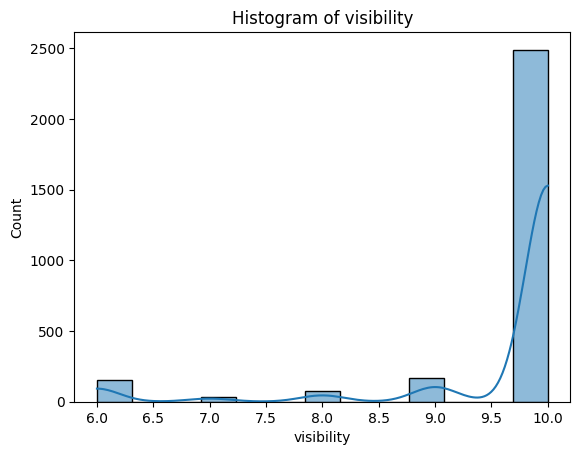

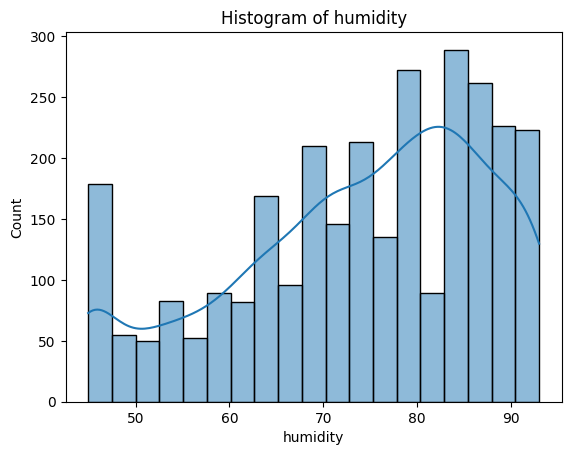

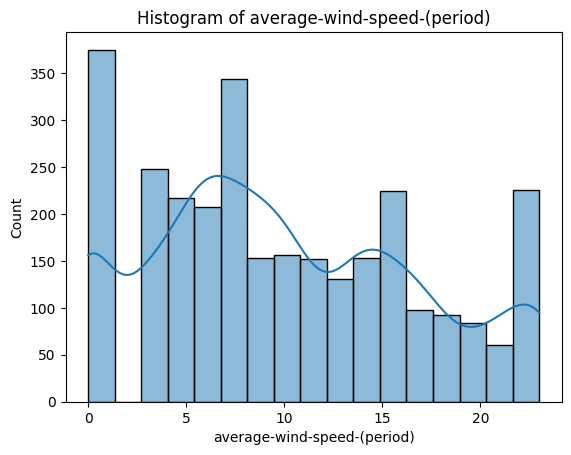

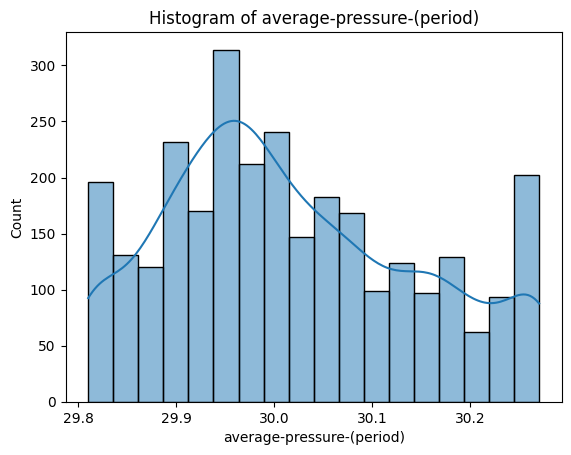

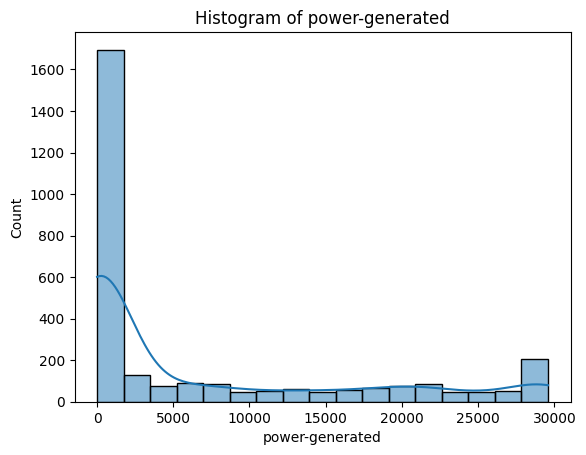

In [99]:
#Histogram
for col in numerical_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Histogram of {col}")
    plt.show()

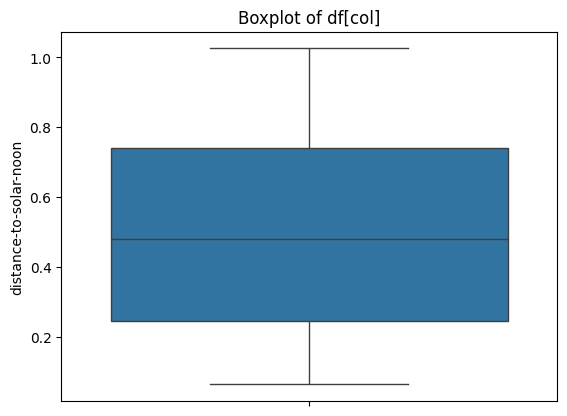

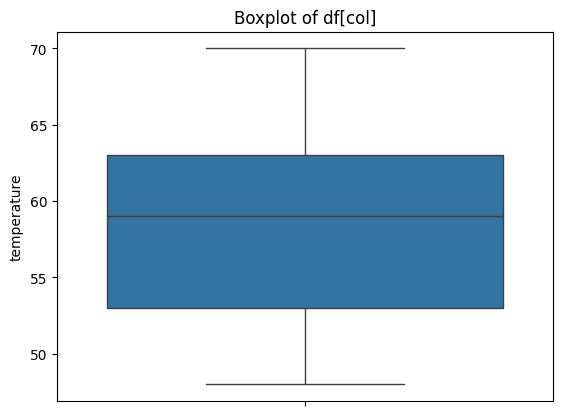

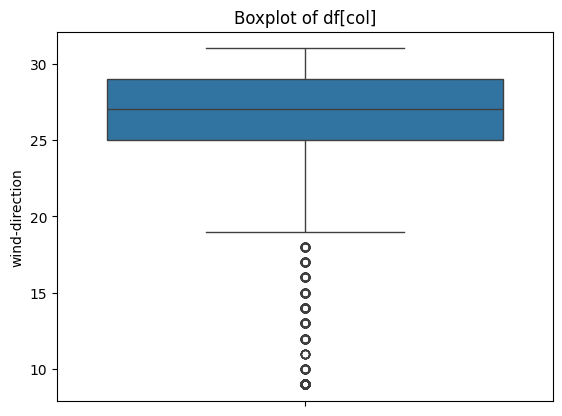

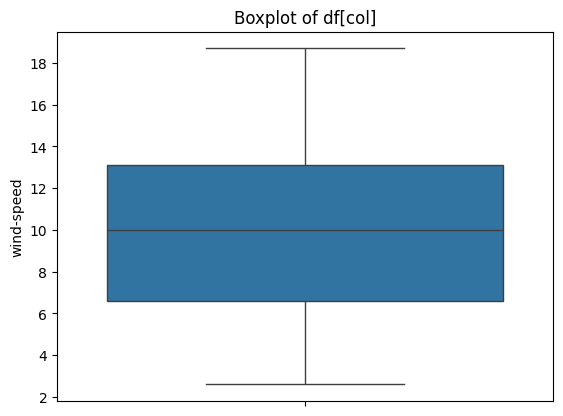

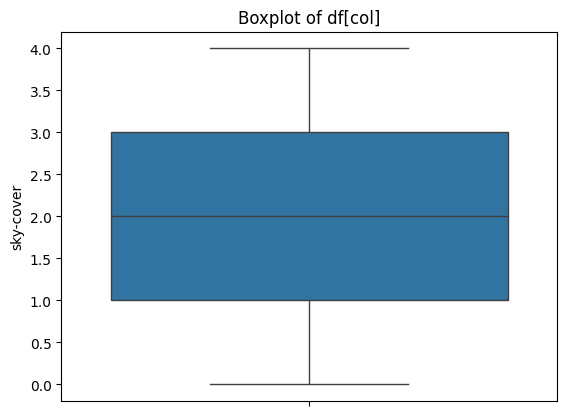

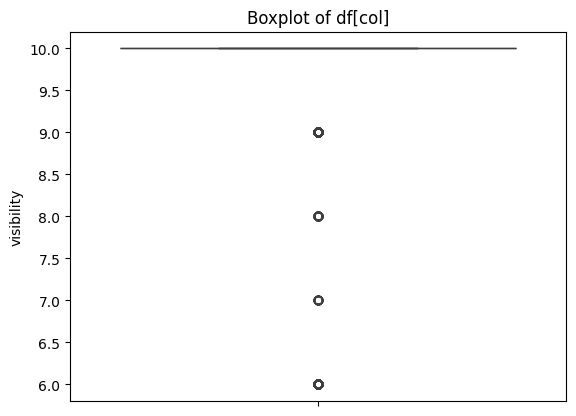

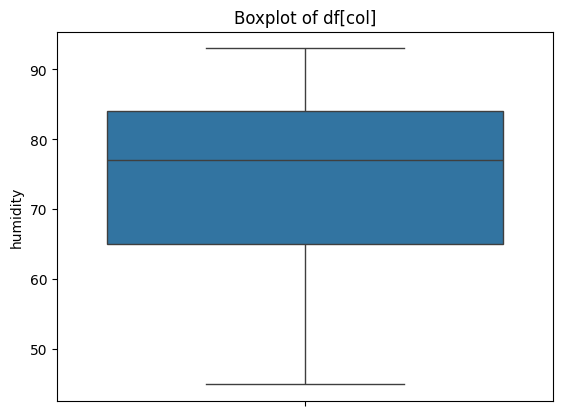

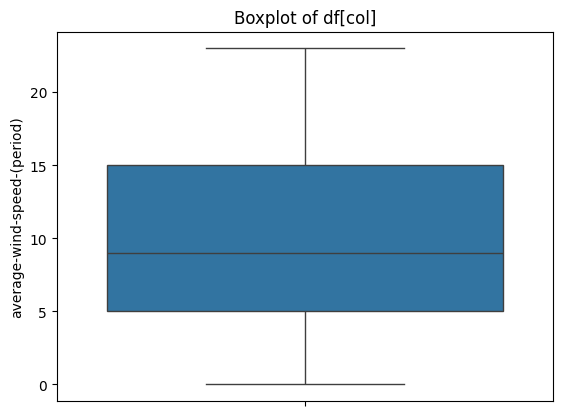

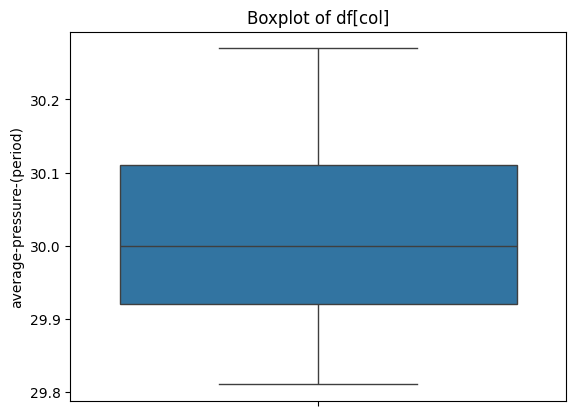

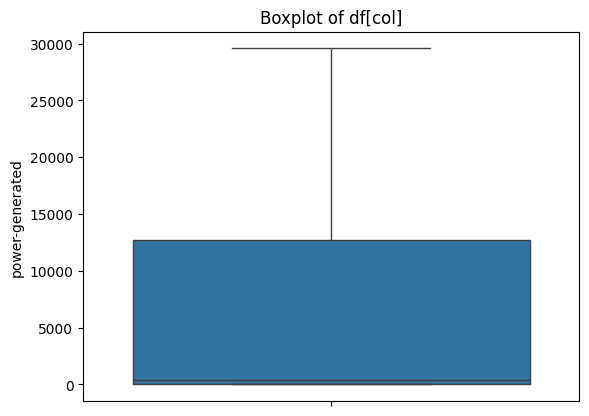

In [100]:
#Boxplot
for col in numerical_cols:
    plt.figure()
    sns.boxplot(df[col])
    plt.title(f"Boxplot of df[col]")
    plt.show()

# Generate the scatter plots or correlation heatmaps to explore relationships between the pairs of variables.

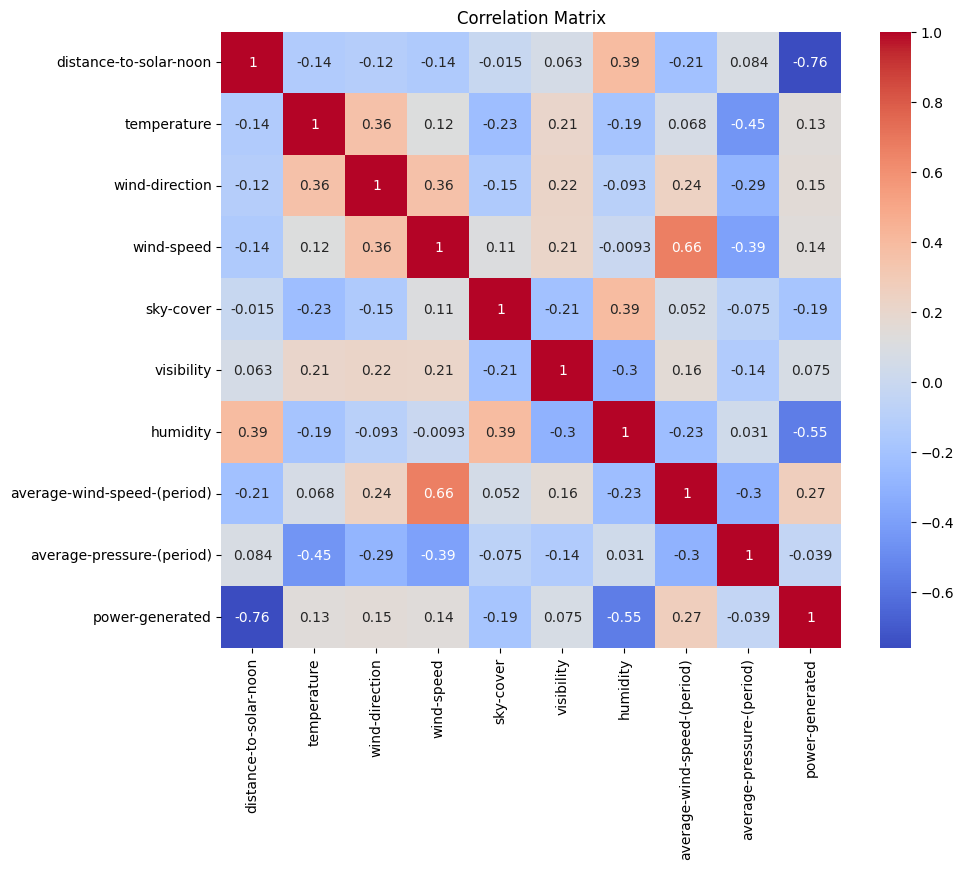

In [101]:
#Correlation Matrix
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [102]:
correlation_matrix= df.corr()
correlation_matrix

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
distance-to-solar-noon,1.000000,-0.138789,-0.116443,-0.144106,-0.015077,0.062931,0.390161,-0.213624,0.083855,-0.758740
temperature,-0.138789,1.000000,0.356087,0.119126,-0.231592,0.209016,-0.192944,0.068233,-0.454173,0.134414
wind-direction,-0.116443,0.356087,1.000000,0.357487,-0.146323,0.218332,-0.092851,0.241581,-0.286592,0.154414
wind-speed,-0.144106,0.119126,0.357487,1.000000,0.112632,0.210437,-0.009350,0.664408,-0.391482,0.137893
sky-cover,-0.015077,-0.231592,-0.146323,0.112632,1.000000,-0.212941,0.393218,0.052232,-0.074875,-0.186402
visibility,0.062931,0.209016,0.218332,0.210437,-0.212941,1.000000,-0.303873,0.157262,-0.137582,0.075236
humidity,0.390161,-0.192944,-0.092851,-0.009350,0.393218,-0.303873,1.000000,-0.232867,0.031457,-0.552680
average-wind-speed-(period),-0.213624,0.068233,0.241581,0.664408,0.052232,0.157262,-0.232867,1.000000,-0.301298,0.268932
average-pressure-(period),0.083855,-0.454173,-0.286592,-0.391482,-0.074875,-0.137582,0.031457,-0.301298,1.000000,-0.039151
power-generated,-0.758740,0.134414,0.154414,0.137893,-0.186402,0.075236,-0.552680,0.268932,-0.039151,1.000000


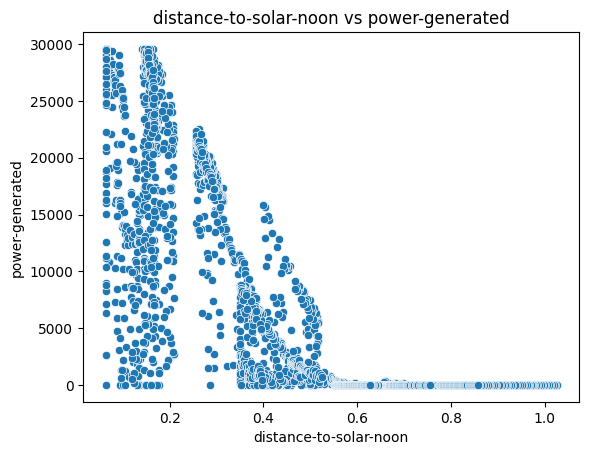

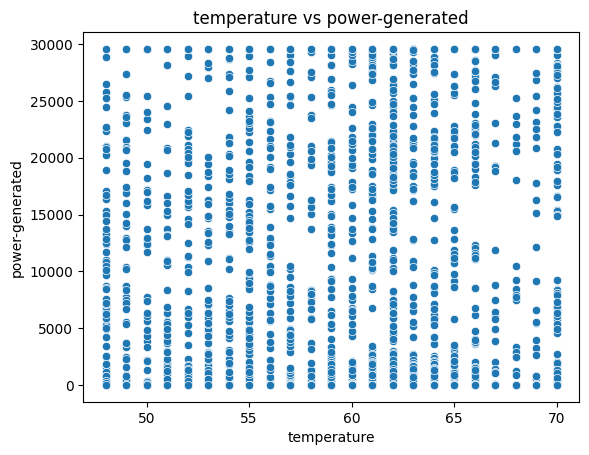

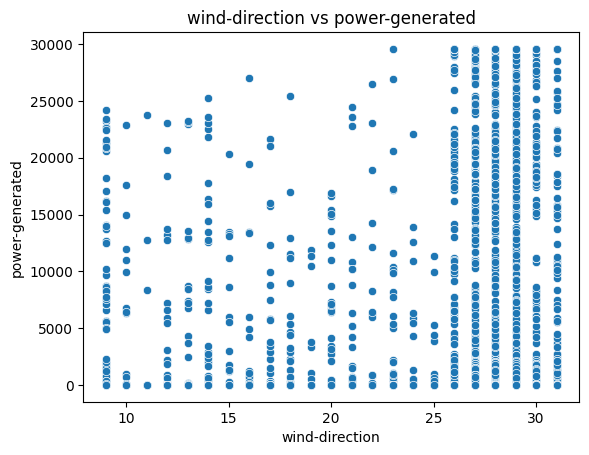

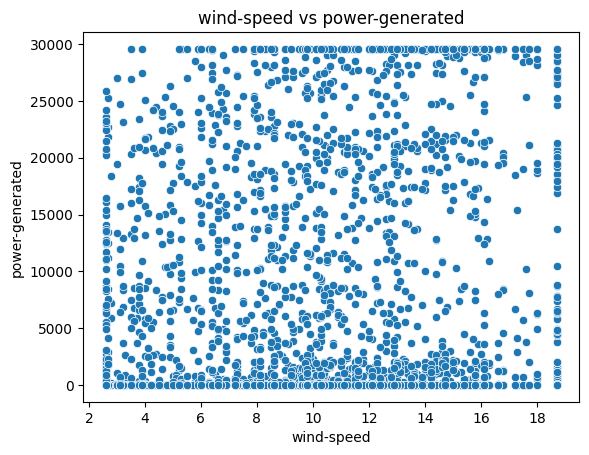

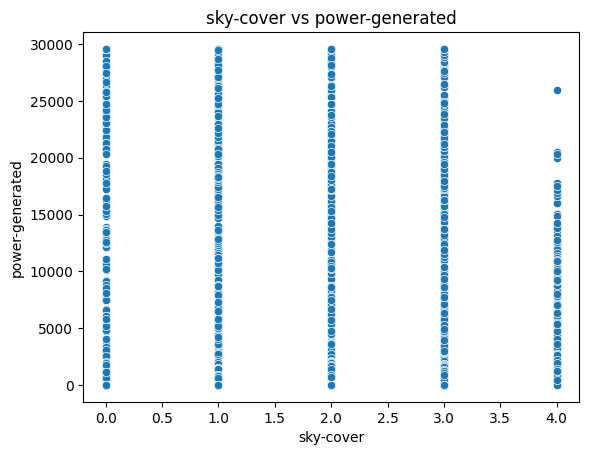

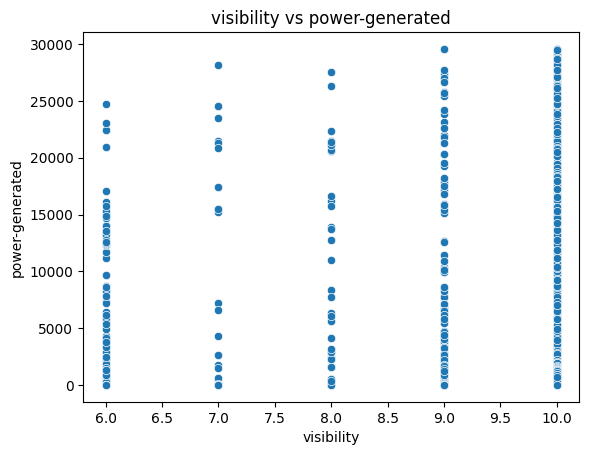

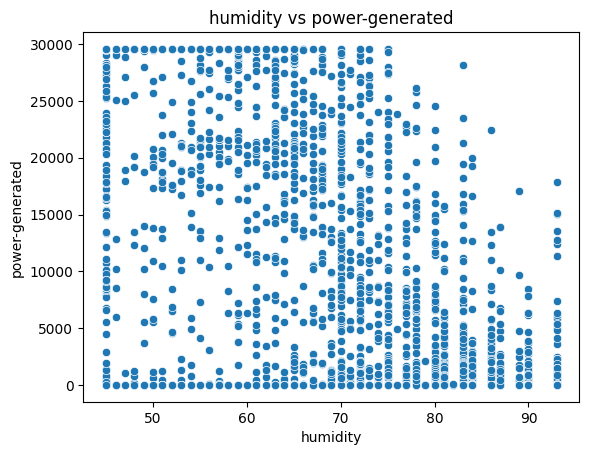

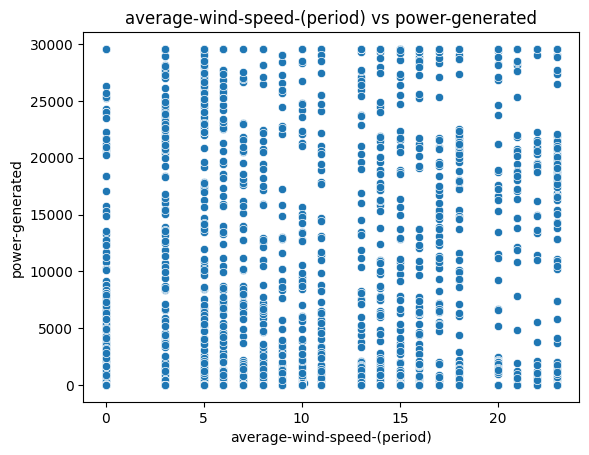

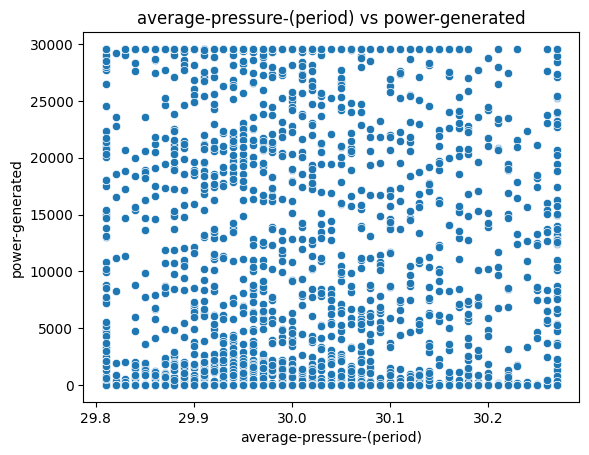

In [103]:
#Feature-target scatter plot
target= 'power-generated'
features= [col for col in df.columns if col !=target]
for feature in features:
    sns.scatterplot(data=df, x=feature, y=target)
    plt.title(f"{feature} vs {target}")
    plt.show()

<Axes: >

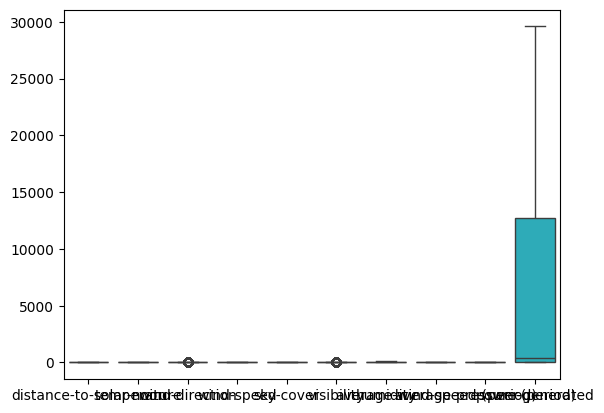

In [104]:
sns.boxplot(df)

In [105]:
q1_power_generated = df['power-generated'].quantile(0.25)
q3_power_generated = df['power-generated'].quantile(0.75)
iqr_power_generated = q3_power_generated - q1_power_generated

In [106]:
upper_limit_power_generated = q3_power_generated + (1.5 * iqr_power_generated)
lower_limit_power_generated = q1_power_generated - (1.5 * iqr_power_generated)
print('upper limit_power-generated', upper_limit_power_generated)
print('lower limit_power-generated', lower_limit_power_generated)

upper limit_power-generated 31808.75
lower limit_power-generated -19085.25


In [107]:
df= df.loc[(df['power-generated']<upper_limit_power_generated)&(df['power-generated']>lower_limit_power_generated)]

<Axes: ylabel='power-generated'>

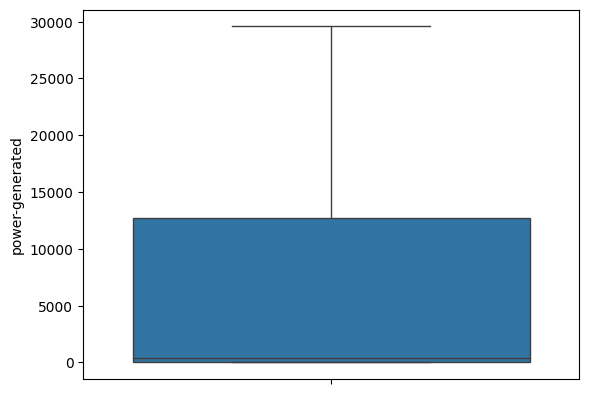

In [108]:
sns.boxplot(df['power-generated'])

##Feature engineering

In [109]:
df

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period),power-generated
0,0.859897,69,28,7.5,0,10.0,75.00,8.0,29.82,0.00
1,0.628535,69,28,7.5,0,10.0,77.00,5.0,29.85,0.00
2,0.397172,69,28,7.5,0,10.0,70.00,0.0,29.89,5418.00
3,0.165810,69,28,7.5,0,10.0,44.95,0.0,29.91,25477.00
4,0.065553,69,28,7.5,0,10.0,44.95,3.0,29.89,29583.25
...,...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75.00,10.0,29.93,6995.00
2916,0.064020,63,27,13.9,1,10.0,66.00,15.0,29.91,29490.00
2917,0.294494,63,27,13.9,2,10.0,68.00,21.0,29.88,17257.00
2918,0.524968,63,27,13.9,2,10.0,81.00,17.0,29.87,677.00


Model building

In [110]:
# Import necessary libraries
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [111]:
x=df.drop('power-generated',axis=1)
y=df[['power-generated']]
x

,distance-to-solar-noon,temperature,wind-direction,wind-speed,sky-cover,visibility,humidity,average-wind-speed-(period),average-pressure-(period)
0,0.859897,69,28,7.5,0,10.0,75.00,8.0,29.82
1,0.628535,69,28,7.5,0,10.0,77.00,5.0,29.85
2,0.397172,69,28,7.5,0,10.0,70.00,0.0,29.89
3,0.165810,69,28,7.5,0,10.0,44.95,0.0,29.91
4,0.065553,69,28,7.5,0,10.0,44.95,3.0,29.89
...,...,...,...,...,...,...,...,...,...
2915,0.166453,63,27,13.9,4,10.0,75.00,10.0,29.93
2916,0.064020,63,27,13.9,1,10.0,66.00,15.0,29.91
2917,0.294494,63,27,13.9,2,10.0,68.00,21.0,29.88
2918,0.524968,63,27,13.9,2,10.0,81.00,17.0,29.87


In [112]:
x_train,x_test,y_train,y_test= train_test_split(x,y,train_size=0.75,random_state=100)

In [113]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2190, 9)
(730, 9)
(2190, 1)
(730, 1)


In [114]:
scaler = StandardScaler()

In [115]:
x_train_scaled = scaler.fit_transform(x_train)

In [116]:
x_test_scaled = scaler.transform(x_test)


model 1: Multiple linear Regression using all features

In [117]:
# model:1 using all features
model1=LinearRegression()

In [118]:
model1.fit(x_train_scaled,y_train)

LinearRegression()

In [119]:
y_pred1= model1.predict(x_test_scaled)
y_pred1

array([[ 2.05466147e+04],
       [ 7.50248658e+03],
       [-1.11846591e+03],
       [-5.01194347e+03],
       [ 1.72603282e+03],
       [ 1.53637415e+04],
       [ 1.19643433e+04],
       [ 7.34824819e+03],
       [ 1.21830170e+04],
       [ 8.81463383e+03],
       [ 1.65321939e+04],
       [ 4.49443837e+03],
       [-3.52693009e+03],
       [ 5.68991023e+02],
       [ 5.68390088e+02],
       [ 1.09327014e+04],
       [ 1.66035548e+04],
       [ 1.75708246e+04],
       [ 3.83670340e+03],
       [ 1.13421807e+04],
       [ 5.97225731e+03],
       [ 1.55704418e+04],
       [ 1.47662964e+04],
       [ 3.82384080e+03],
       [-1.98065108e+03],
       [-4.68119091e+03],
       [-6.79220173e+03],
       [ 1.23772379e+04],
       [ 1.18587911e+04],
       [ 4.63713503e+03],
       [-5.35362096e+03],
       [ 1.22999920e+04],
       [ 1.71186739e+04],
       [-6.52160039e+03],
       [ 8.79686756e+03],
       [ 6.61711748e+03],
       [ 4.91389114e+02],
       [-6.50251870e+03],
       [ 2.1

In [120]:
coefficients1=model1.coef_
print("Model 1 Coefficients:", coefficients1)

Model 1 Coefficients: [[-6602.86703537  -316.37033808   402.69696685   125.19822631
  -1088.89198287   172.31515771 -2317.81457716   713.84026109
    424.0829329 ]]


In [121]:
#Evaluate the model
print(f'R2 score: {r2_score(y_test,y_pred1)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred1))}')
print(f'MSE: {mean_squared_error(y_test, y_pred1)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred1)}')

R2 score: 0.6415608173296004
RMSE: 5594.768554622828
MSE: 31301435.1797964
MAE: 4618.490346130775



model 2: Lasso Regression

In [122]:
model2= Lasso(alpha=0.1)
model2.fit(x_train,y_train)

Lasso(alpha=0.1)

In [123]:
y_pred2= model2.predict(x_test)
y_pred2

array([ 2.05461847e+04,  7.50213674e+03, -1.11949959e+03, -5.01139640e+03,
        1.72755308e+03,  1.53641978e+04,  1.19644976e+04,  7.34831855e+03,
        1.21812910e+04,  8.81423281e+03,  1.65328033e+04,  4.49511960e+03,
       -3.52816191e+03,  5.70874973e+02,  5.68891058e+02,  1.09334509e+04,
        1.66025308e+04,  1.75709012e+04,  3.83866130e+03,  1.13422365e+04,
        5.97119224e+03,  1.55701107e+04,  1.47637784e+04,  3.82342340e+03,
       -1.98034519e+03, -4.68232081e+03, -6.79204957e+03,  1.23780709e+04,
        1.18582192e+04,  4.63794100e+03, -5.35289628e+03,  1.23000279e+04,
        1.71189295e+04, -6.52205923e+03,  8.79497894e+03,  6.61631605e+03,
        4.92454454e+02, -6.50232733e+03,  2.13186652e+04, -8.26245027e+03,
       -1.54326286e+03,  8.41247442e+03,  2.11041643e+03,  4.00399834e+02,
        8.90831977e+03,  1.75160245e+04,  1.07531256e+04, -1.28361614e+03,
        5.44554811e+03,  7.56489847e+03,  3.13582348e+03,  1.15986148e+04,
        2.32995327e+04,  

In [124]:
print('Lasso Regression')
print(f'R2 score: {r2_score(y_test,y_pred2)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred2))}')
print(f'MSE: {mean_squared_error(y_test, y_pred2)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred2)}')

Lasso Regression
R2 score: 0.6415696669024584
RMSE: 5594.699489046372
MSE: 31300662.37273573
MAE: 4618.44606908303



model 3: Ridge Regression

In [125]:
model3= Ridge(alpha=0.1)
model3.fit(x_train,y_train)

Ridge(alpha=0.1)

In [126]:
y_pred3= model3.predict(x_test)
y_pred3

array([[ 2.05442957e+04],
       [ 7.49655193e+03],
       [-1.11981858e+03],
       [-5.00791519e+03],
       [ 1.72988044e+03],
       [ 1.53603578e+04],
       [ 1.19629959e+04],
       [ 7.34890088e+03],
       [ 1.21736876e+04],
       [ 8.81408355e+03],
       [ 1.65319509e+04],
       [ 4.49766278e+03],
       [-3.52291496e+03],
       [ 5.76661932e+02],
       [ 5.71922008e+02],
       [ 1.09336159e+04],
       [ 1.65979261e+04],
       [ 1.75663233e+04],
       [ 3.83678831e+03],
       [ 1.13415874e+04],
       [ 5.96903228e+03],
       [ 1.55660646e+04],
       [ 1.47613191e+04],
       [ 3.82504411e+03],
       [-1.97858811e+03],
       [-4.67770443e+03],
       [-6.78718886e+03],
       [ 1.23792921e+04],
       [ 1.18585650e+04],
       [ 4.63590176e+03],
       [-5.34884831e+03],
       [ 1.22913834e+04],
       [ 1.71205579e+04],
       [-6.51864264e+03],
       [ 8.79094545e+03],
       [ 6.61163336e+03],
       [ 4.94128950e+02],
       [-6.49857686e+03],
       [ 2.1

In [127]:
print('Ridge Regression')
print(f'R2 score: {r2_score(y_test,y_pred3)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred3))}')
print(f'MSE: {mean_squared_error(y_test, y_pred3)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred3)}')

Ridge Regression
R2 score: 0.6416239302851926
RMSE: 5594.275977442242
MSE: 31295923.71178735
MAE: 4617.847510717308


model 4: Decision Tree Regression

In [128]:
model4 = DecisionTreeRegressor(random_state=42)
model4.fit(x_train, y_train)

DecisionTreeRegressor(random_state=42)

In [129]:
y_pred4 = model4.predict(x_test)
y_pred4

array([2.628500e+04, 5.857000e+03, 0.000000e+00, 0.000000e+00,
       0.000000e+00, 2.455300e+04, 3.799000e+03, 0.000000e+00,
       1.396200e+04, 1.356000e+03, 2.177800e+04, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 8.112000e+03,
       2.732300e+04, 1.169600e+04, 1.000000e+00, 4.374000e+03,
       1.259000e+03, 2.068000e+04, 1.725700e+04, 3.724000e+03,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 5.418000e+03,
       1.583600e+04, 8.060000e+02, 0.000000e+00, 8.436000e+03,
       8.741000e+03, 0.000000e+00, 1.272000e+03, 1.364000e+03,
       0.000000e+00, 0.000000e+00, 2.958325e+04, 0.000000e+00,
       0.000000e+00, 4.611000e+03, 0.000000e+00, 0.000000e+00,
       1.971000e+03, 1.483500e+04, 5.857000e+03, 0.000000e+00,
       0.000000e+00, 1.748000e+03, 0.000000e+00, 7.480000e+03,
       2.958325e+04, 0.000000e+00, 1.547100e+04, 0.000000e+00,
       0.000000e+00, 0.000000e+00, 0.000000e+00, 6.900000e+02,
       2.547700e+04, 0.000000e+00, 0.000000e+00, 2.0160

In [130]:
print('Decision Tree Regressor')
print(f'R2 score: {r2_score(y_test,y_pred4)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test,y_pred4))}')
print(f'MSE: {mean_squared_error(y_test, y_pred4)}')
print(f'MAE: {mean_absolute_error(y_test,y_pred4)}')

Decision Tree Regressor
R2 score: 0.8274457556903897
RMSE: 3881.8362304610246
MSE: 15068652.520119857
MAE: 1621.4571917808219


In [131]:
# Use GridSearchCV or RandomizedSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': ['squared_error', 'friedman_mse'],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=model4, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Best Parameters: {'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [132]:
y_pred = grid_search.best_estimator_.predict(x_test)

In [133]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R^2): {r2}")

Mean Squared Error (MSE): 13944214.233551284
R-squared (R^2): 0.8403219301560605
